# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
mnist = io.loadmat("/content/drive/MyDrive/ToBig's/week4/mnist-original.mat") #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

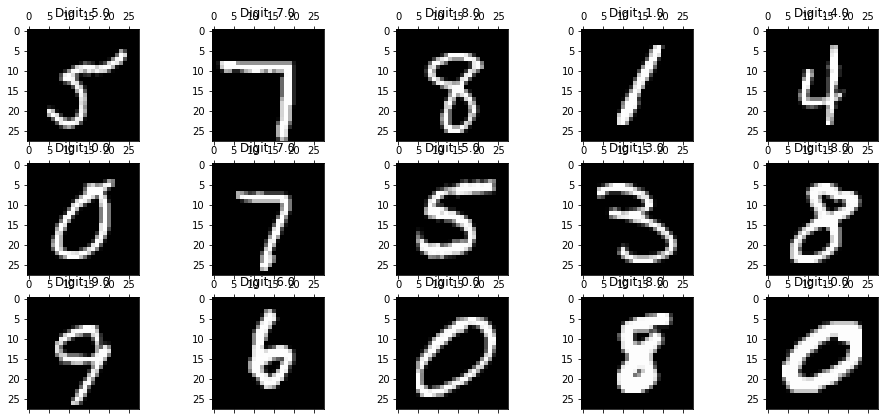

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
#PCA를 이용하기 위해 스케일링 함께 진행
#각 픽셀이 0~255 사이의 값이므로 표준화보다는 정규화를 진행하는 것이 효과적일 것이라 판단
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mm, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56000, 784)
(14000, 784)
(56000, 1)
(14000, 1)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

### PCA

[[-4.23745518e-01  3.24146154e+00 -3.04268362e-01 ...  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-1.05613942e+00  5.90269879e-01 -4.82250988e-02 ... -2.39366171e-16
  -9.24654479e-17 -8.01161319e-17]
 [ 5.05829121e+00  3.07888845e-01 -2.75415519e+00 ... -2.66180817e-16
  -3.62302142e-16 -1.12320367e-16]
 ...
 [ 2.70940909e+00 -2.00723330e+00 -2.32317365e+00 ... -6.15692075e-18
   3.32661279e-18 -1.12023087e-18]
 [-2.75944487e+00 -1.57084633e+00  1.75002350e+00 ...  7.17487004e-18
  -2.39657963e-18 -1.29157807e-18]
 [-9.18949629e-02 -3.77724657e+00 -2.81554720e+00 ... -7.49418172e-18
   8.74586065e-19 -1.17749725e-18]]


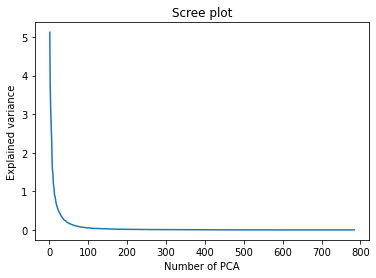

In [11]:
from sklearn.decomposition import PCA

pca = PCA()

after_pca = pca.fit_transform(X_train)
print(after_pca)

plt.title("Scree plot")
plt.plot(np.arange(1,X_train.shape[1]+1), pca.explained_variance_)
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance')
plt.show()

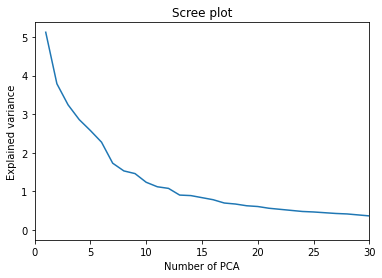

In [12]:
# 더 자세한 관찰을 위해 x축의 범위를 조정
plt.title("Scree plot")
plt.plot(np.arange(1,X_train.shape[1]+1), pca.explained_variance_)
plt.xlim(0, 30)
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance')
plt.show()
#component가 10~15개인 부근에서 엘보우 포인트 관찰 가능

In [13]:
# 카이저 법칙 이용
# 카이저 법칙에 따라 1보다 작은 고유값을 제거
#pca.explained_variance_ : eigenvalue

count = 0

for i in range(784):
  if pca.explained_variance_ [i] >= 1:
    count += 1

print(count)

12


In [14]:
# 강의 자료에 의해 0.7도 많이 사용하므로 시도
count = 0

for i in range(784):
  if pca.explained_variance_ [i] >= 0.7:
    count += 1

print(count)

16


scree plot과 카이저 법칙을 모두 만족하는 component 개수는 12개라고 판단하여 12개로 진행

### LDA

lda 최적의 component값 찾기 : https://chrisalbon.com/code/machine_learning/feature_engineering/select_best_number_of_components_in_lda/
 (다음의 링크 참고)

In [15]:
#LDA 이용해보기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=None)
after_lda = lda.fit(X_train, y_train)

lda_var_ratios = lda.explained_variance_ratio_

def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        
        # 목표 지점 달성 시
        if total_variance >= goal_var:
            break

    return n_components

select_n_components(lda_var_ratios, 0.95)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8

lda가 목표 variance에 달성하기 위해서는 8개의 component를 사용하는 것이 최적임을 찾을 수 있다.

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

### 로지스틱 회귀 모델 이용

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_1 = LogisticRegression()

import timeit #training 시간 비교를 위해 임포트
start_time = timeit.default_timer()#시작 시간 체크

print("원본 데이터 - 로지스틱 회귀 모델")
model_1.fit(X_train, y_train)
print("정확도 :", accuracy_score(y_test, model_1.predict(X_test)))

terminate_time = timeit.default_timer() # 종료 시간 체크  
print("%f초 걸렸습니다." % (terminate_time - start_time))

원본 데이터 - 로지스틱 회귀 모델


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


정확도 : 0.9211428571428572
37.122031초 걸렸습니다.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
#pca 차원 축소 이후 모델 적용
pca = PCA(n_components = 12)
after_pca = pca.fit_transform(X_train)

#pca로 테스트 데이터도 차원 축소
X_pca_test = pca.transform(X_test)

start_time = timeit.default_timer()#시작 시간 체크

print("pca 차원축소 데이터 - 로지스틱 회귀 모델")
model_1.fit(after_pca, y_train)
print("정확도 :", accuracy_score(y_test, model_1.predict(X_pca_test)))

terminate_time = timeit.default_timer() # 종료 시간 체크  
print("%f초 걸렸습니다." % (terminate_time - start_time))

pca 차원축소 데이터 - 로지스틱 회귀 모델


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


정확도 : 0.8243571428571429
5.795177초 걸렸습니다.


정확도는 감소했지만 학습 시간 단축이 굉장히 크게 된 것을 확인할 수 있다.

In [18]:
#lda 차원 축소 이후 모델 적용
lda = LinearDiscriminantAnalysis(n_components=8)
after_lda = lda.fit_transform(X_train, y_train)

#lda로 테스트 데이터도 차원 축소
X_lda_test = lda.transform(X_test)

start_time = timeit.default_timer()#시작 시간 체크

print("lda 차원축소 데이터 - 로지스틱 회귀 모델")
model_1.fit(after_lda, y_train)
print("정확도 :", accuracy_score(y_test, model_1.predict(X_lda_test)))

terminate_time = timeit.default_timer() # 종료 시간 체크  
print("%f초 걸렸습니다." % (terminate_time - start_time))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


lda 차원축소 데이터 - 로지스틱 회귀 모델


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


정확도 : 0.8777142857142857
3.996768초 걸렸습니다.


pca보다 정확도도 적게 감소했고, 학습 시간도 더 많이 단축된 것을 볼 수 있다.

### 서포트벡터머신 모델 이용

In [19]:
import sklearn.svm as svm

# SVM, kernel = 'linear'로 선형분리 진행
model_2 = svm.SVC(kernel = 'linear', max_iter=1000)

start_time = timeit.default_timer()#시작 시간 체크

print("원본 데이터 - 서포트벡터머신 모델")
model_2.fit(X_train, y_train)
print("정확도 :", accuracy_score(y_test, model_2.predict(X_test)))

terminate_time = timeit.default_timer() # 종료 시간 체크  
print("%f초 걸렸습니다." % (terminate_time - start_time))

원본 데이터 - 서포트벡터머신 모델


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


정확도 : 0.8053571428571429
279.724600초 걸렸습니다.


로지스틱 회귀 모델에 비해 정확도가 감소했고, 학습 시간 역시 증가했다.

In [20]:
#pca 차원 축소 이후 모델 적용
pca = PCA(n_components = 12)
after_pca = pca.fit_transform(X_train)

#pca로 테스트 데이터도 차원 축소
X_pca_test = pca.transform(X_test)

start_time = timeit.default_timer()#시작 시간 체크

print("pca 차원축소 데이터 - 서포트벡터머신 모델")
model_2.fit(after_pca, y_train)
print("정확도 :", accuracy_score(y_test, model_2.predict(X_pca_test)))

terminate_time = timeit.default_timer() # 종료 시간 체크  
print("%f초 걸렸습니다." % (terminate_time - start_time))

pca 차원축소 데이터 - 서포트벡터머신 모델


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


정확도 : 0.622
23.943962초 걸렸습니다.


정확도가 크게 감소했지만, 학습 시간 역시 크게 단축되었다.

In [21]:
#lda 차원 축소 이후 모델 적용
lda = LinearDiscriminantAnalysis(n_components=8)
after_lda = lda.fit_transform(X_train, y_train)

#lda로 테스트 데이터도 차원 축소
X_lda_test = lda.transform(X_test)

start_time = timeit.default_timer()#시작 시간 체크

print("lda 차원축소 데이터 - 서포트벡터머신 모델")
model_2.fit(after_lda, y_train)
print("정확도 :", accuracy_score(y_test, model_2.predict(X_lda_test)))

terminate_time = timeit.default_timer() # 종료 시간 체크  
print("%f초 걸렸습니다." % (terminate_time - start_time))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


lda 차원축소 데이터 - 서포트벡터머신 모델


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


정확도 : 0.7565714285714286
22.806723초 걸렸습니다.


pca에 비해 정확도는 적게 감소했으며, 학습에 걸리는 시간은 거의 비슷한 것을 볼 수 있다.

결론적으로 모델 적용 결과 로지스틱 회귀 모델의 정확도가 전반적으로 높았고, 현재 코드에서는 pca 보다는 lda가 더 좋은 차원축소 능력을 보였다.